# Model Fitting and Review

## Getting Started

Before we can begin building models, we're going to bring in our SciKit Learn extensions and retrieve our modified dataset for preprocessing.

**Note:** We'll be using XGBoost in this as well, which isn't included in SciKit Learn.

In [1]:
#Bring in our processing and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import model tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

#Import XGBoost
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('Final_set.csv')
df.head()

,Unnamed: 0,special,outcome_type,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_weekday,intake_number,time_in_shelter_days,Intact,Sex
0,0,None,Return to Owner,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,10.0,"(7.5, 10.0]",12,Thursday,1.0,0.588194,False,Male
1,1,None,Return to Owner,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,7.0,"(5.0, 7.5]",12,Friday,2.0,1.259722,False,Male
2,2,None,Return to Owner,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,6.0,"(5.0, 7.5]",3,Friday,3.0,1.113889,False,Male
3,3,None,Transfer,10 years,A047759,Dog,Dachshund,Tricolor,Normal,Owner Surrender,10.0,"(7.5, 10.0]",4,Wednesday,1.0,4.970139,False,Male
4,4,None,Return to Owner,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,16.0,"(15.0, 17.5]",11,Saturday,1.0,0.119444,False,Male


In [3]:
df.columns

Index(['Unnamed: 0', 'special', 'outcome_type', 'age_upon_intake',
       'animal_id_intake', 'animal_type', 'breed', 'color', 'intake_condition',
       'intake_type', 'age_upon_intake_(years)', 'age_upon_intake_age_group',
       'intake_month', 'intake_weekday', 'intake_number',
       'time_in_shelter_days', 'Intact', 'Sex'],
      dtype='object')

The import rbought in an unnamed column, so we're going to drop that real quick before we begin.

In [4]:
df.drop(columns= ['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,special,outcome_type,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_weekday,intake_number,time_in_shelter_days,Intact,Sex
0,None,Return to Owner,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,10.0,"(7.5, 10.0]",12,Thursday,1.0,0.588194,False,Male
1,None,Return to Owner,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,7.0,"(5.0, 7.5]",12,Friday,2.0,1.259722,False,Male
2,None,Return to Owner,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,6.0,"(5.0, 7.5]",3,Friday,3.0,1.113889,False,Male
3,None,Transfer,10 years,A047759,Dog,Dachshund,Tricolor,Normal,Owner Surrender,10.0,"(7.5, 10.0]",4,Wednesday,1.0,4.970139,False,Male
4,None,Return to Owner,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,16.0,"(15.0, 17.5]",11,Saturday,1.0,0.119444,False,Male


In [5]:
len(df.columns)

17

# Preprocessing - Encoding Categorical Data

To prepare our data for classification, we're going to have to dummy it out. We're going to just make quick use of Pandas built in `.get_dummies` feature.

In [6]:
target = pd.get_dummies(df.outcome_type)
target.head()

,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0


In [7]:
vars = df.drop(columns = ['outcome_type'], axis = 1)
vars.head()

,special,age_upon_intake,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,age_upon_intake_(years),age_upon_intake_age_group,intake_month,intake_weekday,intake_number,time_in_shelter_days,Intact,Sex
0,None,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,10.0,"(7.5, 10.0]",12,Thursday,1.0,0.588194,False,Male
1,None,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,7.0,"(5.0, 7.5]",12,Friday,2.0,1.259722,False,Male
2,None,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,6.0,"(5.0, 7.5]",3,Friday,3.0,1.113889,False,Male
3,None,10 years,A047759,Dog,Dachshund,Tricolor,Normal,Owner Surrender,10.0,"(7.5, 10.0]",4,Wednesday,1.0,4.970139,False,Male
4,None,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,16.0,"(15.0, 17.5]",11,Saturday,1.0,0.119444,False,Male


In [8]:
vars.dtypes

special                       object
age_upon_intake               object
animal_id_intake              object
animal_type                   object
breed                         object
color                         object
intake_condition              object
intake_type                   object
age_upon_intake_(years)      float64
age_upon_intake_age_group     object
intake_month                   int64
intake_weekday                object
intake_number                float64
time_in_shelter_days         float64
Intact                          bool
Sex                           object
dtype: object

## Setting up our variables

Since our variables are actually different types of objects (object, float64, integers, and we introduced a boolean object in the prior demo), we don't want to dummy these out. If we dummy out the integers and numbers, each one is going to get a column - which will add yet even more columns that we won't need.

So, before we dummy out the variables, we're going to separate them into two types:  `vars_cat`, which will carry our categorical variables; and `vars_num`, which will carry our numerical and boolean variables. Then, in the end, we'll merge them together in `predictors`.

In [9]:
#Need to drop the "Age Upon Intake" column which contains a string description of estimated age.
vars.drop(columns = ['age_upon_intake'], inplace = True)
vars.dtypes

special                       object
animal_id_intake              object
animal_type                   object
breed                         object
color                         object
intake_condition              object
intake_type                   object
age_upon_intake_(years)      float64
age_upon_intake_age_group     object
intake_month                   int64
intake_weekday                object
intake_number                float64
time_in_shelter_days         float64
Intact                          bool
Sex                           object
dtype: object

In [10]:
vars_cat = vars[['special',
                'animal_type',
                'breed',
                'color',
                'intake_condition',
                'intake_type',
                'age_upon_intake_age_group',
                'intake_weekday',
                'Intact',
                'Sex']]
vars_cat.dtypes

special                      object
animal_type                  object
breed                        object
color                        object
intake_condition             object
intake_type                  object
age_upon_intake_age_group    object
intake_weekday               object
Intact                         bool
Sex                          object
dtype: object

In [11]:
vars_cat = pd.get_dummies(vars_cat)

In [12]:
vars_cat.head()

,Intact,special_Aggressive,special_Behavior,special_Court/Investigation,special_None,special_Rabies Risk,special_SCRP,special_Snr,special_Suffering,special_Underage,...,intake_weekday_Friday,intake_weekday_Monday,intake_weekday_Saturday,intake_weekday_Sunday,intake_weekday_Thursday,intake_weekday_Tuesday,intake_weekday_Wednesday,Sex_Female,Sex_Male,Sex_Unknown
0,False,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,False,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,False,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,False,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,False,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [13]:
vars_num = vars[['age_upon_intake_(years)', 'intake_month', 'intake_number', 'time_in_shelter_days']]

In [14]:
vars_num.head()

,age_upon_intake_(years),intake_month,intake_number,time_in_shelter_days
0,10.0,12,1.0,0.588194
1,7.0,12,2.0,1.259722
2,6.0,3,3.0,1.113889
3,10.0,4,1.0,4.970139
4,16.0,11,1.0,0.119444


In [15]:
predictors = vars_num.merge(vars_cat, how = 'outer', left_index = True, right_index = True)
predictors.head()

,age_upon_intake_(years),intake_month,intake_number,time_in_shelter_days,Intact,special_Aggressive,special_Behavior,special_Court/Investigation,special_None,special_Rabies Risk,...,intake_weekday_Friday,intake_weekday_Monday,intake_weekday_Saturday,intake_weekday_Sunday,intake_weekday_Thursday,intake_weekday_Tuesday,intake_weekday_Wednesday,Sex_Female,Sex_Male,Sex_Unknown
0,10.0,12,1.0,0.588194,False,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,7.0,12,2.0,1.259722,False,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,6.0,3,3.0,1.113889,False,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,10.0,4,1.0,4.970139,False,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,16.0,11,1.0,0.119444,False,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


# First Model:  Decision Tree

We're going to bring in a Decision Tree model first, just to get an idea of what our baseline is going to look like.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3)

In [50]:
clf = DecisionTreeClassifier(criterion = 'entropy')

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
y_preds = clf.predict(X_test)
print(accuracy_score(y_test, y_preds))

0.7784426126616176


In [52]:
print(cross_val_score(clf, X_train, y_train, cv = 3))

[0.77775985 0.77871631 0.77166837]


Right away we're sitting at an average 78% accuracy. That's pretty good, for just getting started. We'll have to see how much more interesting things can get.

### Top 5 Features

The Decision Tree Classifier will explain the more influential features of our model. However, recall that we have 2,735 columns now? In order to extract the top five, we're going to just create a dictionary with all the features and all their names, then sort it to select and present the top 5 before plotting them.

In [53]:
t = dict(zip(clf.feature_importances_, X_train.columns.values))

Text(0, 0.5, 'Importance')

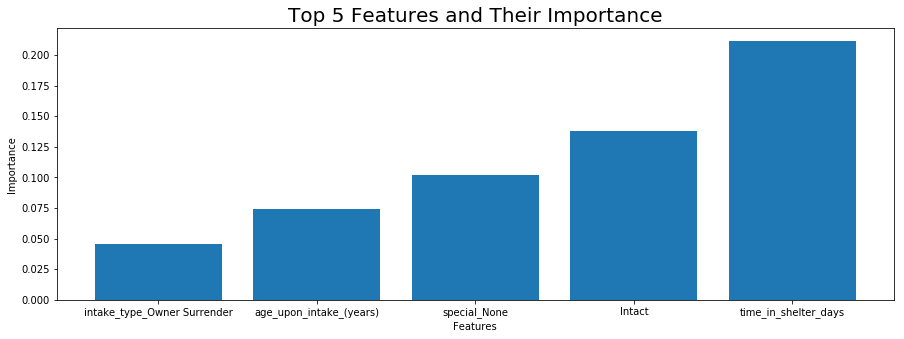

In [54]:
importance = sorted(t)[-5:]

features = []

for i in importance:
    features.append(t[i])
    
plt.figure(figsize = [15,5])
plt.bar(features, importance)
plt.title('Top 5 Features and Their Importance', fontsize = 20)
plt.xlabel('Features')
plt.ylabel('Importance')

Looks like our variable `Intact` actually turned out to be very important. It makes sense that animals that aren't desexed may have different outcomes. However, our most valuable predictor is the time an animal has spent in the shelter leading up to the outcome.

Also useful is knowing that the animal has no "special" condition which could impact its outcome - not a surprise, this feature was designed with the idea of separating out those animals with unique outcomes.

# Random Forest

Here, we're going to use a Random Forest classification and see how it turns out.

In [57]:
forest = RandomForestClassifier(n_estimators = 100, n_jobs = 6)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=6,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
forest.score(X_train, y_train)

0.9999461999210932

In [59]:
forest.score(X_test, y_test)

0.7812042344867987

### Fine Tuning the Hyperperamaters

Obviously, our model way overfit. A 99% score on the training data and then a 79% score on the test data does not bode well for our model. There's a very good chance that, sicne we didn't set any limitations, the model just maximized everything. What we're going to do from here is largely leave the details untouched, but block the forest from overfitting by specifying limits on the number of features used and the maximum depth of the trees.

We're going to use `GridSearchCV` to check these paramters, then see how the best forest performs and what parameters worked best.

In [60]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_features': [None, 2, 4, 6, 8, 10],
              'max_depth': [None, 2, 4, 6, 8, 10]
             }

In [61]:
forest_grid = GridSearchCV(RandomForestClassifier(), param_grid, return_train_score = True, n_jobs = -2)

In [62]:
forest_grid.fit(X_train, y_train)

C:\Users\mulli\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\mulli\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': [None, 2, 4, 6, 8, 10], 'max_depth': [None, 2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [63]:
forest_grid.score(X_train, y_train)

0.816147197015889

In [64]:
forest_grid.score(X_test, y_test)

0.8111218042595925

In [65]:
forest_grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': None}

There's a much lower difference between our train and test accuracy this time, suggesting that we finally got a model that's not too overfit and still robust to random data. Also, we've got a 4% absolute increase in accuracy over our baseline tree model, which is pretty good.

# Adaboost Classifier

Let's see if the adaboost classifier will work out. This will require some different preprocessing than the others:  Adaboost and Gradient Boost want single column targets that are encoded. So, we'll have to create a new target called `encoded_target` for this classifier to work.

In [105]:
encoded_target = df['outcome_type']
encoded_target.value_counts()

Adoption           33594
Transfer           23799
Return to Owner    14790
Euthanasia          6244
Died                 690
Disposal             304
Rto-Adopt            179
Missing               46
Relocate              15
Name: outcome_type, dtype: int64

In [106]:
keys = {'Adoption': 0,
       'Transfer': 1,
       'Return to Owner': 2,
       'Euthanasia': 3,
       'Died': 4,
       'Disposal': 5,
       'Rto-Adopt': 6,
       'Missing': 7,
       'Relocate': 8}

encoded_target = encoded_target.replace(keys)
encoded_target.value_counts()

0    33594
1    23799
2    14790
3     6244
4      690
5      304
6      179
7       46
8       15
Name: outcome_type, dtype: int64

Split everything into train/test.

In [78]:
X_test, X_train, y_test, y_train = train_test_split(predictors, encoded_target, test_size = 0.3)

In [84]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [89]:
test_predictions = adaboost.predict(X_test)
train_predictions = adaboost.predict(X_train)

test_accuracy = accuracy_score(y_test, test_predictions)
train_accuracy = accuracy_score(y_train, train_predictions)

In [90]:
test_accuracy

0.6028298841504968

In [91]:
train_accuracy

0.5979748106615339

Hands down the worst accuracy score we've seen, even worse than our baseline decision tree.

# Gradient Boost

In [92]:
gradient = GradientBoostingClassifier()
gradient.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [93]:
test_predictions = gradient.predict(X_test)
train_predictions = gradient.predict(X_train)

test_accuracy = accuracy_score(y_test, test_predictions)
train_accuracy = accuracy_score(y_train, train_predictions)

In [94]:
test_accuracy

0.8211147376349486

In [95]:
train_accuracy

0.830913427340056

Now we're sitting at an 82% accuracy - another percentage point higher than our random forest, and a full 5% points higher than our baseline tree.

# XG Boost

In [16]:
XG_target = df['outcome_type']
XG_target.head()

0    Return to Owner
1    Return to Owner
2    Return to Owner
3           Transfer
4    Return to Owner
Name: outcome_type, dtype: object

In [17]:
X_train, X_test, y_train, y_test = train_test_split(predictors, XG_target, test_size = 0.3)

In [18]:
rename = {'age_upon_intake_age_group_(-0.025, 2.5]': 'age_upon_intake_age_group_-0.025 2.5',
            'age_upon_intake_age_group_(10.0, 12.5]': 'age_upon_intake_age_group_10.0 12.5',
            'age_upon_intake_age_group_(12.5, 15.0]': 'age_upon_intake_age_group_12.5 15.0',
            'age_upon_intake_age_group_(15.0, 17.5]': 'age_upon_intake_age_group_15.0 17.5',
            'age_upon_intake_age_group_(17.5, 20.0]': 'age_upon_intake_age_group_17.5 20.0',
            'age_upon_intake_age_group_(2.5, 5.0]': 'age_upon_intake_age_group_2.5 5.0',
            'age_upon_intake_age_group_(20.0, 22.5]': 'age_upon_intake_age_group_20.0 22.5',
            'age_upon_intake_age_group_(22.5, 25.0]': 'age_upon_intake_age_group_22.5 25.0',
            'age_upon_intake_age_group_(5.0, 7.5]': 'age_upon_intake_age_group_5.0 7.5',
            'age_upon_intake_age_group_(7.5, 10.0]': 'age_upon_intake_age_group_7.5 10.0'
         }

X_train = X_train.rename(columns = rename)
X_test = X_test.rename(columns = rename)

for i in X_train.columns:
    if ',' in i:
        print(i)

In [19]:
XGB = XGBClassifier(nthread = 12)

In [20]:
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=12, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [21]:
training_preds = XGB.predict(X_train)
testing_preds = XGB.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
testing_accuracy = accuracy_score(y_test, testing_preds)

print(training_accuracy)
print(testing_accuracy)

0.8235895412646606
0.8265199380727227


Surprisingly, XGBoost has the same performance as our random forest that we found through GridSearch.

In [22]:
matrix = confusion_matrix(y_test, testing_preds)
matrix

array([[9677,    0,    0,    0,    0,    0,  120,    0,  362],
       [  24,    6,   13,    5,    0,    0,   18,    0,  130],
       [   0,    5,   63,   12,    0,    0,    5,    0,    8],
       [   9,    3,   21, 1804,    0,    1,   10,    0,   45],
       [   8,    0,    0,    0,    0,    0,    4,    0,    3],
       [   3,    1,    1,    0,    0,    0,    0,    0,    1],
       [ 699,    0,    0,    0,    0,    0, 3607,    0,  162],
       [  51,    0,    0,    0,    0,    0,    4,    0,    5],
       [2192,    2,    2,    2,    0,    0,  215,    0, 4596]],
      dtype=int64)

In [23]:
df_CM = pd.DataFrame(matrix, index = [i for i in sorted(y_train.unique())], 
                     columns = [i for i in sorted(y_train.unique())])
df_CM

,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
Adoption,9677,0,0,0,0,0,120,0,362
Died,24,6,13,5,0,0,18,0,130
Disposal,0,5,63,12,0,0,5,0,8
Euthanasia,9,3,21,1804,0,1,10,0,45
Missing,8,0,0,0,0,0,4,0,3
Relocate,3,1,1,0,0,0,0,0,1
Return to Owner,699,0,0,0,0,0,3607,0,162
Rto-Adopt,51,0,0,0,0,0,4,0,5
Transfer,2192,2,2,2,0,0,215,0,4596


In [24]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

CM_scaled = min_max_scaler.fit_transform(df_CM)
_df_CM = pd.DataFrame(CM_scaled,  index = [i for i in sorted(y_train.unique())], 
                     columns = [i for i in sorted(y_train.unique())])

C:\Users\mulli\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


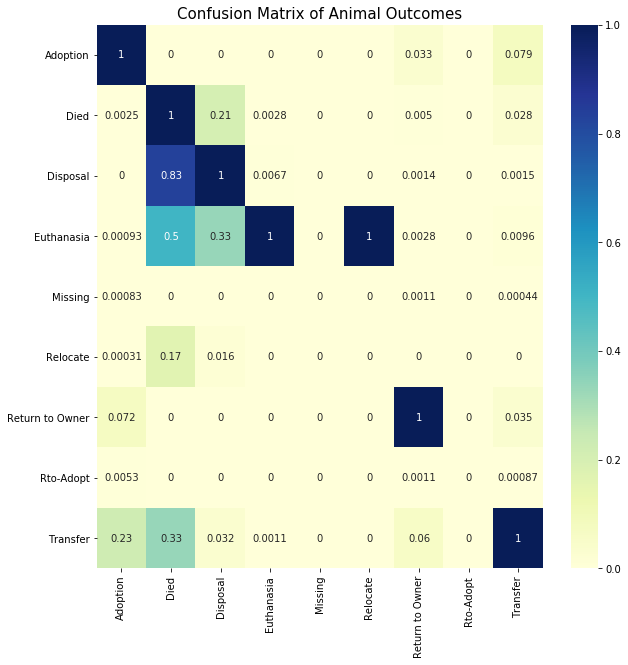

In [30]:
plt.figure(figsize = (10,10))
plt.title('Confusion Matrix of Animal Outcomes', fontsize = 15)


sns.heatmap(_df_CM, cmap = "YlGnBu", annot = True)